Position: (4.44, 0.44)
Angle: 0.00 rad
Angular velocity: 0.00 rad/s
Linear velocity: -0.10 m/s
Handlebar angle: 0.00 rad


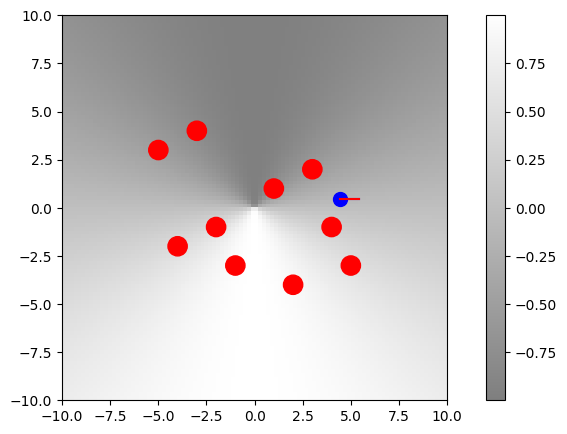

Position: (4.42, 0.44)
Angle: 0.00 rad
Angular velocity: 0.01 rad/s
Linear velocity: -0.20 m/s
Handlebar angle: 0.10 rad


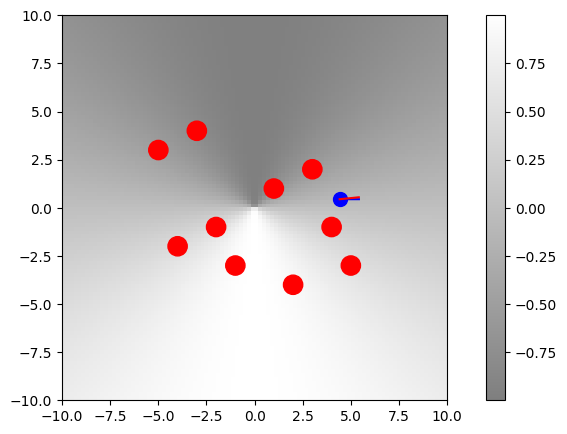

Position: (4.38, 0.44)
Angle: 0.00 rad
Angular velocity: 0.00 rad/s
Linear velocity: -0.39 m/s
Handlebar angle: 0.10 rad


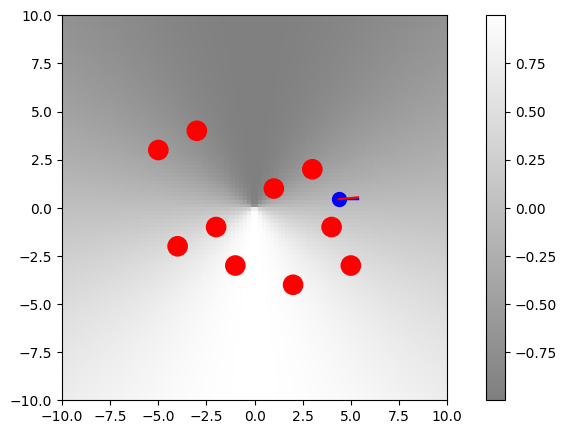

Position: (4.32, 0.44)
Angle: 0.00 rad
Angular velocity: -0.01 rad/s
Linear velocity: -0.59 m/s
Handlebar angle: 0.10 rad


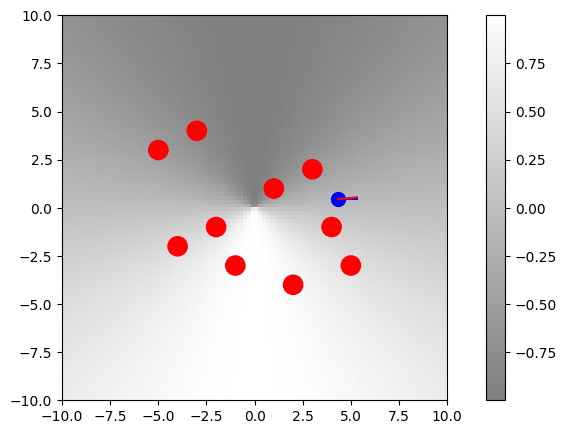

Position: (4.25, 0.44)
Angle: -0.00 rad
Angular velocity: -0.02 rad/s
Linear velocity: -0.69 m/s
Handlebar angle: 0.00 rad


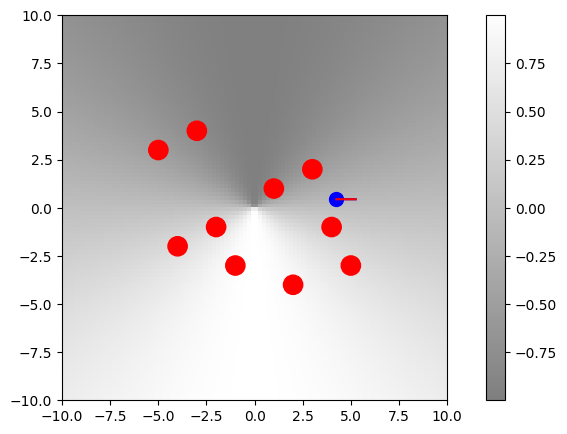

Position: (4.16, 0.44)
Angle: -0.00 rad
Angular velocity: -0.02 rad/s
Linear velocity: -0.89 m/s
Handlebar angle: 0.00 rad


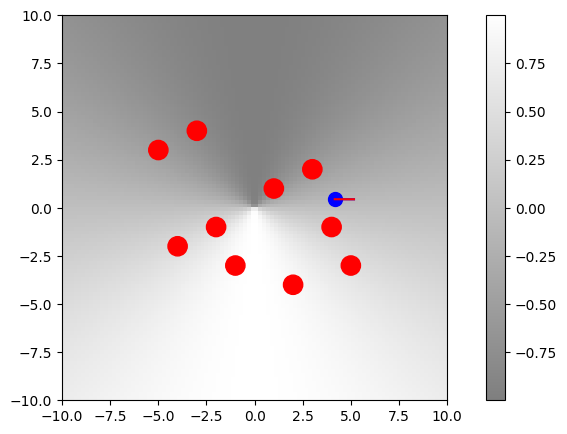

Position: (4.06, 0.45)
Angle: -0.00 rad
Angular velocity: -0.01 rad/s
Linear velocity: -0.98 m/s
Handlebar angle: 0.10 rad


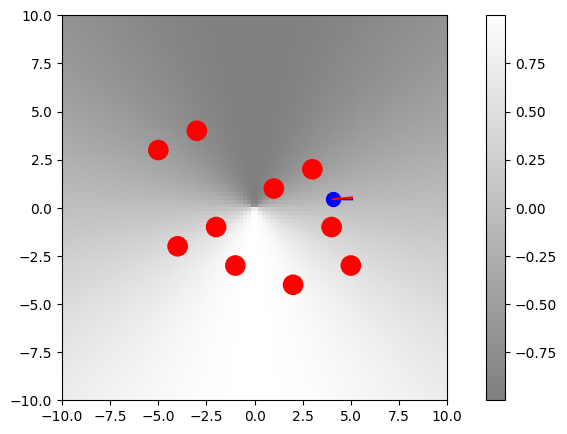

Position: (3.97, 0.45)
Angle: -0.00 rad
Angular velocity: 0.00 rad/s
Linear velocity: -0.98 m/s
Handlebar angle: 0.10 rad


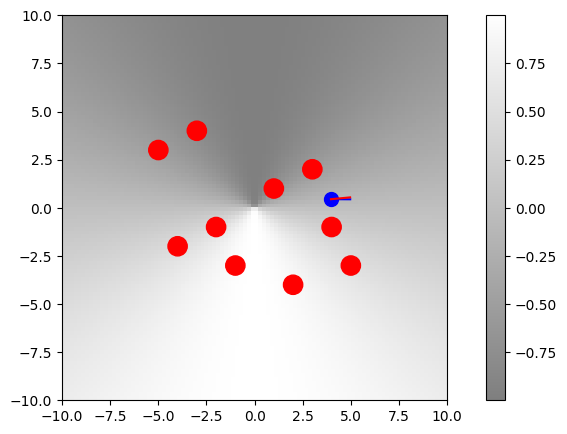

Position: (3.87, 0.45)
Angle: -0.00 rad
Angular velocity: 0.01 rad/s
Linear velocity: -0.98 m/s
Handlebar angle: 0.10 rad


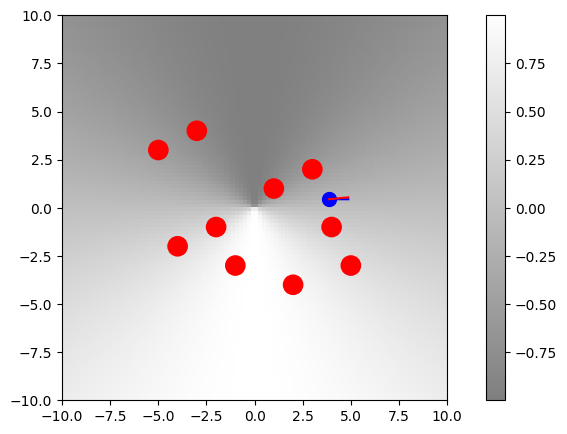

Position: (3.75, 0.45)
Angle: -0.00 rad
Angular velocity: 0.00 rad/s
Linear velocity: -1.18 m/s
Handlebar angle: 0.10 rad


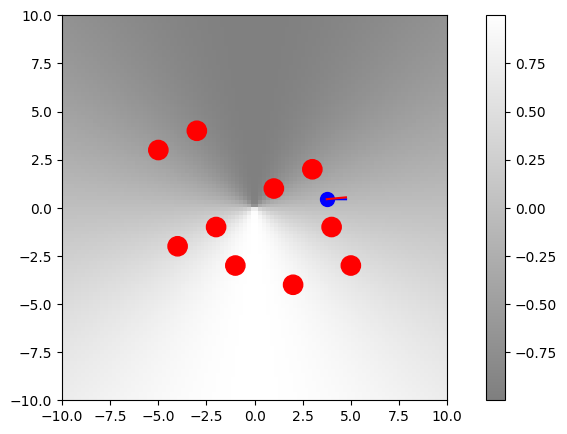

Position: (3.62, 0.45)
Angle: -0.00 rad
Angular velocity: 0.01 rad/s
Linear velocity: -1.28 m/s
Handlebar angle: 0.20 rad


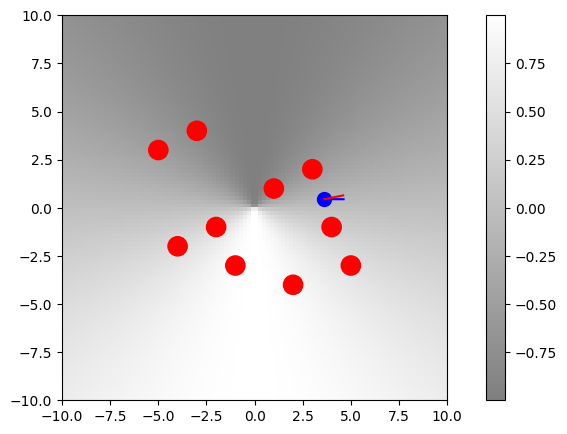

Position: (3.48, 0.45)
Angle: -0.00 rad
Angular velocity: -0.01 rad/s
Linear velocity: -1.47 m/s
Handlebar angle: 0.20 rad


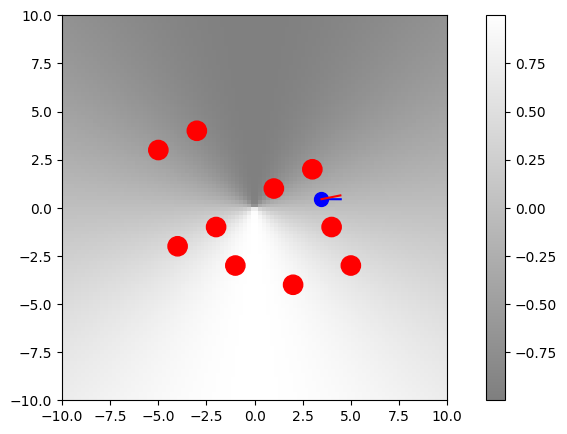

Position: (3.32, 0.45)
Angle: -0.00 rad
Angular velocity: 0.00 rad/s
Linear velocity: -1.57 m/s
Handlebar angle: 0.30 rad


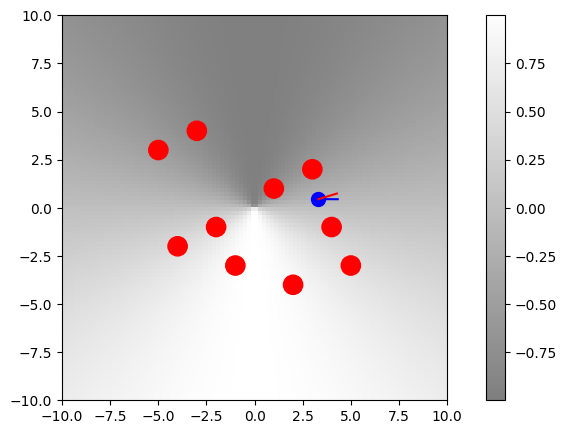

Position: (3.15, 0.45)
Angle: -0.00 rad
Angular velocity: 0.01 rad/s
Linear velocity: -1.67 m/s
Handlebar angle: 0.40 rad


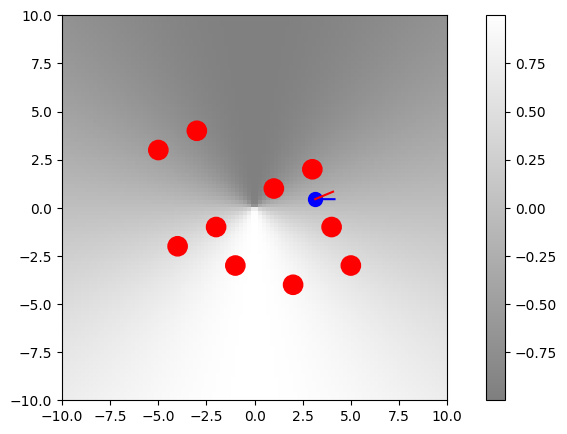

Position: (2.97, 0.45)
Angle: -0.00 rad
Angular velocity: 0.02 rad/s
Linear velocity: -1.77 m/s
Handlebar angle: 0.50 rad


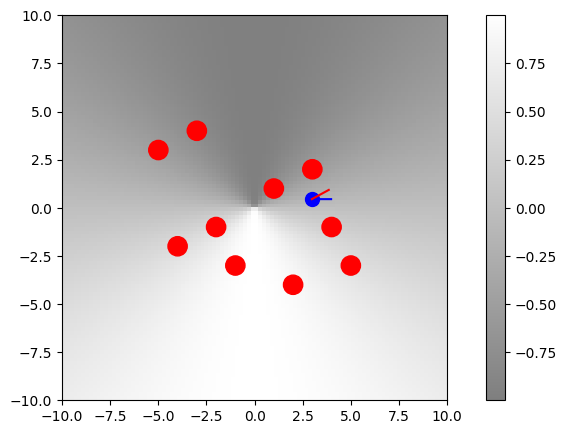

Position: (2.78, 0.45)
Angle: -0.00 rad
Angular velocity: -0.03 rad/s
Linear velocity: -1.95 m/s
Handlebar angle: 0.50 rad


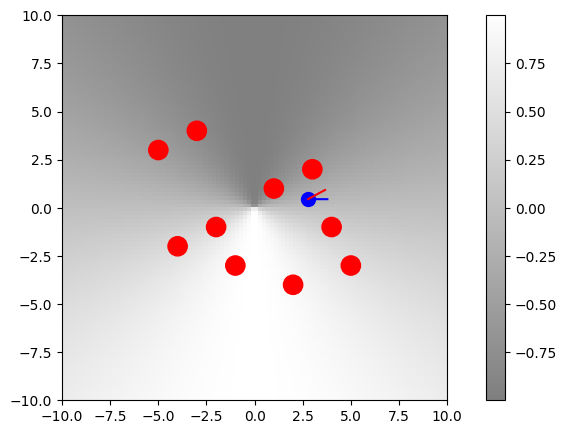

Position: (2.57, 0.45)
Angle: -0.01 rad
Angular velocity: -0.02 rad/s
Linear velocity: -2.05 m/s
Handlebar angle: 0.60 rad


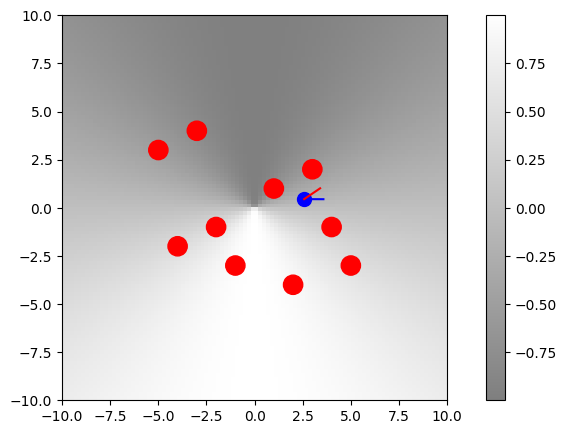

Position: (2.35, 0.45)
Angle: -0.01 rad
Angular velocity: -0.07 rad/s
Linear velocity: -2.23 m/s
Handlebar angle: 0.60 rad


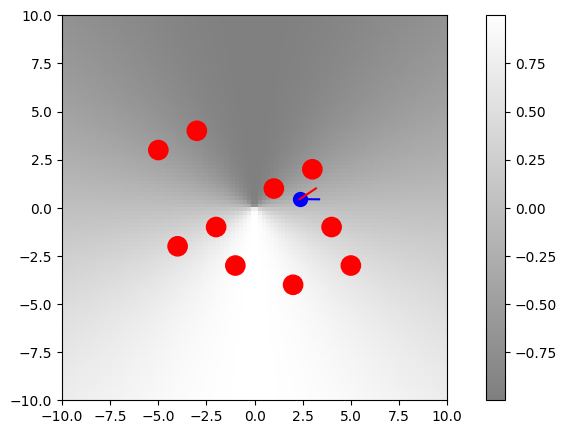

Position: (2.11, 0.45)
Angle: -0.03 rad
Angular velocity: -0.13 rad/s
Linear velocity: -2.41 m/s
Handlebar angle: 0.60 rad


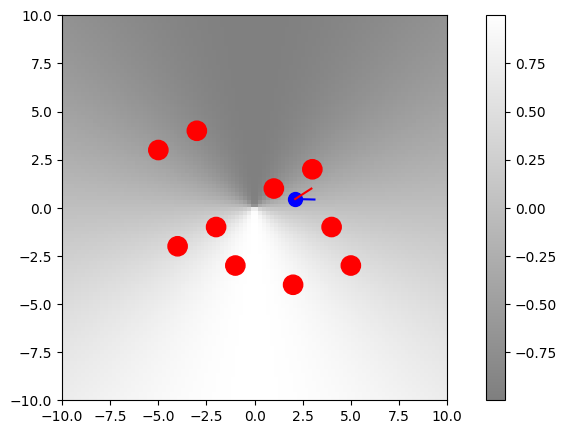

Position: (1.86, 0.46)
Angle: -0.04 rad
Angular velocity: -0.14 rad/s
Linear velocity: -2.51 m/s
Handlebar angle: 0.50 rad


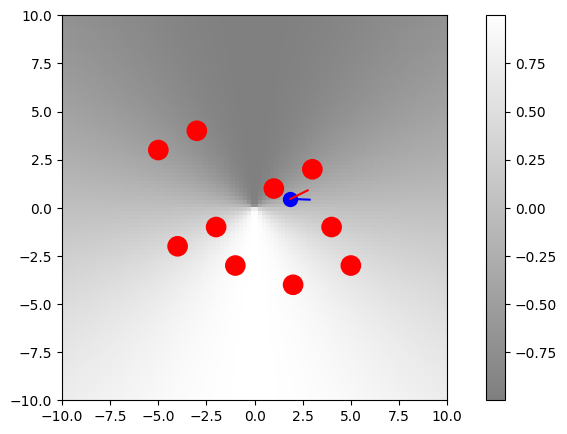

Position: (1.59, 0.47)
Angle: -0.06 rad
Angular velocity: -0.19 rad/s
Linear velocity: -2.69 m/s
Handlebar angle: 0.50 rad


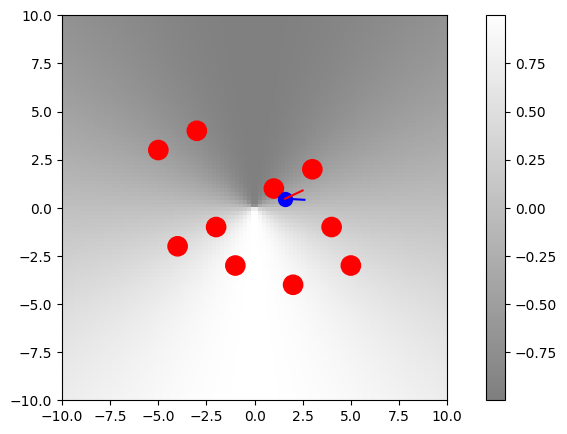

Position: (1.30, 0.49)
Angle: -0.08 rad
Angular velocity: -0.24 rad/s
Linear velocity: -2.88 m/s
Handlebar angle: 0.50 rad


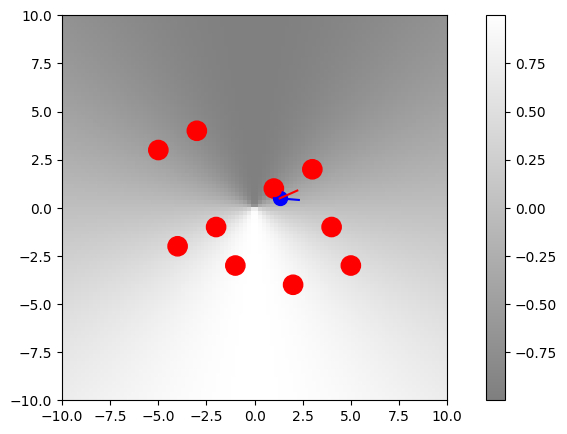

Episode finished


In [10]:
# Import OpenAI gym and numpy
import gym
import numpy as np
import matplotlib.pyplot as plt

# Define a custom environment class for the bicycle simulation
class BicycleEnv(gym.Env):
    # Initialize the environment with some parameters
    def __init__(self):
        # Define the action space as a discrete space of 4 actions:
        # 0: pedal forward, 1: pedal backward, 2: turn left, 3: turn right
        self.action_space = gym.spaces.Discrete(4)

        # Define the observation space as a box space of 6 variables:
        # x: horizontal position, y: vertical position, theta: angle of the bicycle,
        # omega: angular velocity of the bicycle, v: linear velocity of the bicycle,
        # phi: angle of the handlebar
        self.observation_space = gym.spaces.Box(low=np.array([-10, -10, -np.pi, -np.inf, -np.inf, -np.pi/4]),
                                                high=np.array([10, 10, np.pi, np.inf, np.inf, np.pi/4]),
                                                dtype=np.float32)

        # Define some constants for the simulation
        self.g = 9.81 # gravity
        self.m = 10 # mass of the bicycle
        self.l = 1 # length of the bicycle
        self.r = 0.2 # radius of the wheel
        self.dt = 0.1 # time step

        # Define some variables for the ground surface
        self.slope = 0.1 # slope of the ground
        self.obstacles = [(3, 2), (-2, -1), (5, -3)] # positions of the 

        #add a few more obstacles
        self.obstacles = [(3, 2), (-2, -1), (5, -3), (1, 1), (-3, 4), (2, -4), (-4, -2), (-5, 3), (4, -1), (-1, -3)]


        self.obstacle_radius = 0.5 # radius of the obstacles

        # Reset the environment
        self.reset()

    # Reset the environment to a random initial state
    def reset(self):
        # Set the initial position to a random point on the ground
        self.x = np.random.uniform(-10, 10)
        self.y = self.slope * self.x

        # Set the initial angle and angular velocity to zero
        self.theta = 0
        self.omega = 0

        # Set the initial linear velocity to a small positive value
        self.v = 0.1

        # Set the initial handlebar angle to zero
        self.phi = 0

        # Return the initial observation as a numpy array
        return np.array([self.x, self.y, self.theta, self.omega, self.v, self.phi])

    # Step the environment with a given action
    def step(self, action):
        # Apply the action to change the handlebar angle and the pedaling force
        if action == 0:
            # Pedal forward with a constant force
            f = 10
        elif action == 1:
            # Pedal backward with a constant force
            f = -10
        else:
            # No pedaling force
            f = 0

        if action == 2:
            # Turn left with a constant torque
            tau = -1
        elif action == 3:
            # Turn right with a constant torque
            tau = 1
        else:
            # No turning torque
            tau = 0

        # Update the handlebar angle with a limit of pi/4 radians
        self.phi += tau * self.dt
        self.phi = np.clip(self.phi, -np.pi/4, np.pi/4)

        # Calculate the net force and torque on the bicycle
        Fx = f * np.cos(self.phi) - self.m * self.g * np.sin(self.slope) # horizontal force
        Fy = f * np.sin(self.phi) + self.m * self.g * np.cos(self.slope) # vertical force
        T = f * self.l * np.sin(self.phi) + tau # torque

        # Update the linear and angular velocities using Euler's method
        self.v += Fx / self.m * self.dt 
        self.omega += T / (self.m * self.l**2) * self.dt

        # Update the position and angle using Euler's method
        self.x += self.v * np.cos(self.theta) * self.dt 
        self.y += self.v * np.sin(self.theta) * self.dt
        self.theta += self.omega * self.dt

        # Wrap the angle to the range [-pi, pi]
        self.theta = (self.theta + np.pi) % (2 * np.pi) - np.pi

        # Check if the bicycle has collided with any obstacle or gone out of bounds
        done = False # flag to indicate if the episode is over
        reward = 0 # reward to return

        if self.x < -10 or self.x > 10 or self.y < -10 or self.y > 10:
            # The bicycle has gone out of bounds
            done = True
            reward = -10 # negative reward for failure
        else:
            for obstacle in self.obstacles:
                # Calculate the distance from the bicycle to the obstacle
                dist = np.sqrt((self.x - obstacle[0])**2 + (self.y - obstacle[1])**2)
                if dist < self.obstacle_radius + self.r:
                    # The bicycle has collided with the obstacle
                    done = True
                    reward = -10 # negative reward for failure
                    break

        if not done:
            # The bicycle is still in the simulation
            reward = 1 # positive reward for survival

        # Return the observation, reward, done flag, and an empty info dictionary
        return np.array([self.x, self.y, self.theta, self.omega, self.v, self.phi]), reward, done, {}

    # Render the environment as a text output
    def render(self, mode='human'):
        # Print the current state of the environment
        print(f"Position: ({self.x:.2f}, {self.y:.2f})")
        print(f"Angle: {self.theta:.2f} rad")
        print(f"Angular velocity: {self.omega:.2f} rad/s")
        print(f"Linear velocity: {self.v:.2f} m/s")
        print(f"Handlebar angle: {self.phi:.2f} rad")

        # plot the bicycle and obstacles
        plt.figure(figsize=(10, 5))
        plt.plot(self.x, self.y, 'bo', markersize=10)
        plt.plot([self.x, self.x + np.cos(self.theta)], [self.y, self.y + np.sin(self.theta)], 'b-')
        plt.plot([self.x, self.x + np.cos(self.theta + self.phi)], [self.y, self.y + np.sin(self.theta + self.phi)], 'r-')
        for obstacle in self.obstacles:
            plt.plot(obstacle[0], obstacle[1], 'ro', markersize=10)
            plt.gca().add_patch(plt.Circle(obstacle, self.obstacle_radius, color='r'))
        plt.xlim([-10, 10])
        plt.ylim([-10, 10])

        # Display the sloped region as a heatmap
        x_grid = np.linspace(-10, 10, 100)  
        y_grid = np.linspace(-10, 10, 100)
        X, Y = np.meshgrid(x_grid, y_grid)
        Z = np.sin(np.arctan2(Y, X))
        plt.imshow(Z, extent=(-10, 10, -10, 10), cmap='gray', alpha=0.5)
        plt.colorbar()

        # Display the plot
        


        plt.show()

        






# Create an instance of the environment
env = BicycleEnv()

# Run a random episode for 100 steps
for i in range(10000000000000000):
    # Choose a random action from the action space
    action = env.action_space.sample()

    # Step the environment with the action and get the observation, reward, done flag, and info dictionary
    obs, reward, done, info = env.step(action)

    # Render the environment
    env.render()

    # Check if the episode is over
    if done:
        print("Episode finished")
        break

# Close the environment
env.close()